In [2]:
import numpy as np
import os
from os.path import join
from scipy.ndimage.morphology import binary_dilation

In [5]:
from matplotlib import pyplot as plt
import math


def plot_one_slice(array_3d, dim, idx):
    plt.figure(dpi=120)
    if dim=='x':  # shape of array_3d should be z,x,y
        plt.imshow(array_3d[:,idx,:], cmap='Greys')
    elif dim=='y':
        plt.imshow(array_3d[:,:,idx], cmap='Greys')
    elif dim=='z':
#         array_3d[array_3d<118]=0
        plt.imshow(array_3d[idx,:,:], cmap='Greys')
    plt.colorbar()
    plt.show()

def plot_merged_slices(array_3d, dim, idx0, idx1, title=None):
    plt.figure(dpi=200)
    if dim=='x':  # shape of array_3d should be z,x,y
        to_show=np.max(array_3d[:,idx0:idx1,:], axis=1)
        plt.imshow(to_show, cmap='Greys')  # aspect=2
    elif dim=='y':
        plt.imshow(np.max(array_3d[:,:,idx0:idx1], axis=2), cmap='Greys')
    elif dim=='z':
#         array_3d[array_3d<118]=0
        plt.imshow(np.max(array_3d[idx0:idx1,:,:], axis=0), cmap='Greys')
    plt.colorbar()
    
    if title is not None:
        plt.title(title)
    plt.show()
    
    
def load_npz_to_array(filename, key='arr_0'):
    return np.load(filename)[key]
        
    
def normalize_to(arr, min_value, max_value):
    arr = arr.astype(np.float32)
    arr -= arr.min()
    arr /= (arr.max() - arr.min())
    arr *= (max_value - min_value)
    arr += min_value
    return arr

In [13]:
# data_dir = '/home/user/zhaoy/local_dir/data/random_virtual_roots/diff_time_points/994161/stopTime100.00%'
data_dir = '/home/user/zhaoy/local_dir/data/random_virtual_roots/diff_time_points/imitate_lupine22/902950/stopTime100.00%'
occ = np.load(join(data_dir, 'ground_truth_res_2x_notThresholded.npy'))
gt = np.load(join(data_dir, 'ground_truth_res_2x.npy'))
print(occ.shape)
print(gt.shape)

(400, 512, 512)
(400, 512, 512)


In [14]:
occ = binary_dilation(occ, iterations=2).astype(occ.dtype)
occ[gt>0] = 0


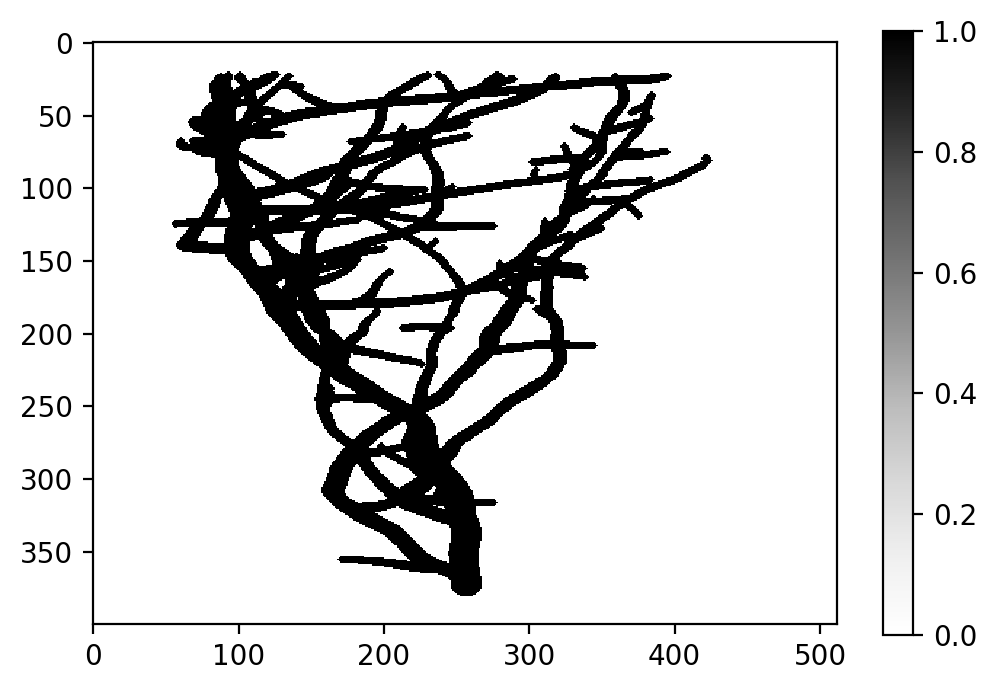

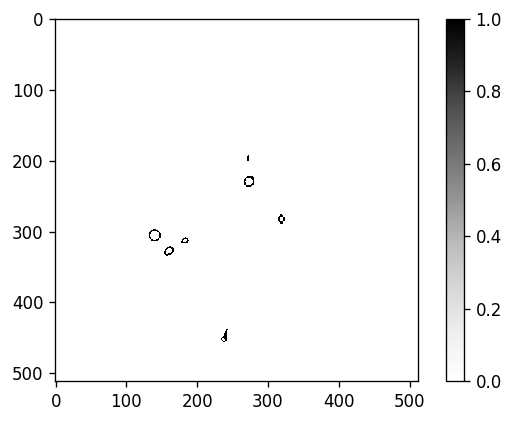

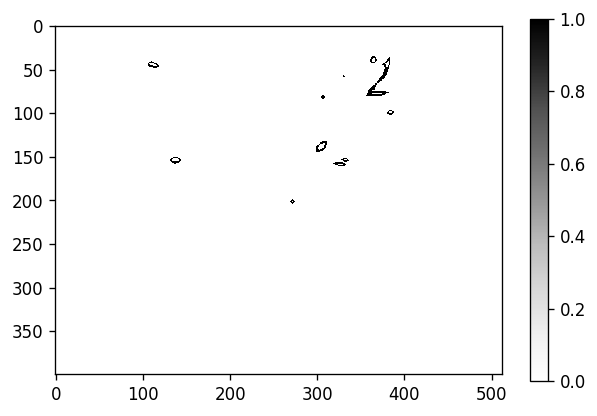

In [16]:
plot_merged_slices(occ, 'x', 0,512)
plot_one_slice(occ, 'z', 200)
plot_one_slice(occ, 'x', 200)

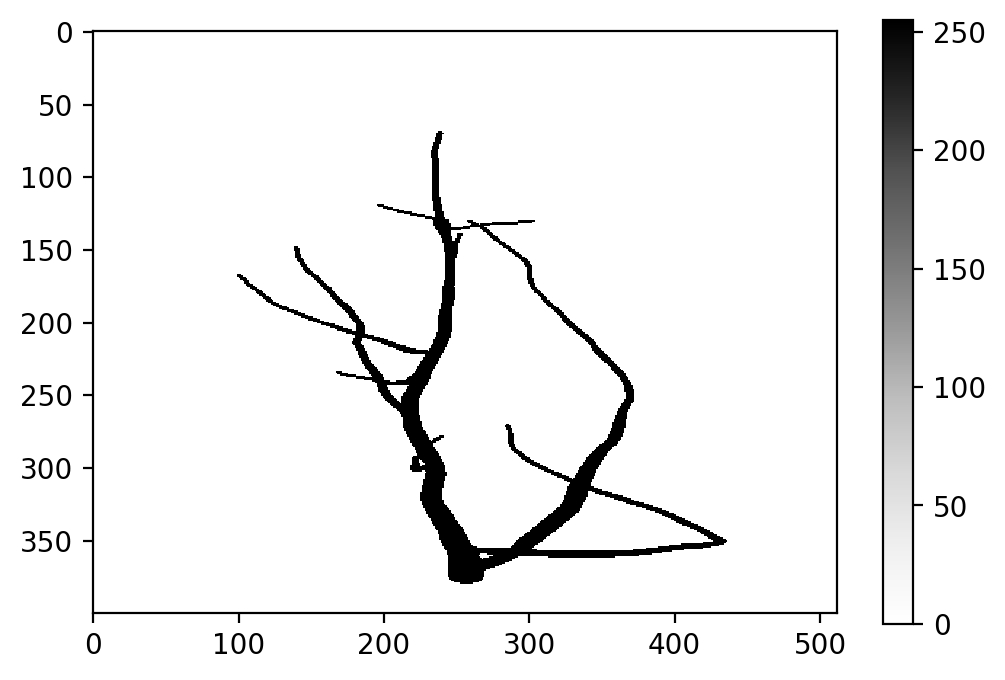

In [7]:
plot_merged_slicezzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzs(gt, 'x', 0,512)